#Group Project | Final Submission
###Instructor: Professor Gary Thai
###Godwin Aizenofe
###Franck Monte
###Daniel Gidron
#Choice of API source was changed to Tommorrow.io
1. 400 Bad Request: This error indicates that the request was invalid or malformed, and the server cannot process it.

2. 401 Unauthorized: This error means that the request requires authentication, but the provided credentials are invalid or missing.

3. 403 Forbidden: This error occurs when the server understands the request, but the user does not have sufficient permissions to access the requested resource.

4. 404 Not Found: This error suggests that the requested resource could not be found on the server.

5. 500 Internal Server Error: This is a generic server error indicating that something went wrong on the server while processing the request.

##Godwin Questions
**Question 1:** Convert the time display from 2023-12-10T11:00:00Z to a more user friendly manner that tells the day of the week, then MMM, DD, YYYY and Time.

**Question 2:** Determine if temperature is good enough for outdoor activity

**question 3:** Include a visualization of temperature for days of the week

##Franck Questions
**Question 1:** Access the API environment, extract and generate a chart which will tell the user when the temperature is higher base on the date and generate a datframe.

**Question 2:** Make a word cloud of the specific weather word which are going to help the user to know the some technicall word used to interpret weather. Then generate chart to compare the max and min temperature to see the day which has the higher and lower temperature and generate a dataframe with the hole information.

**Question 3:** Make a prediction which are going to tell the user when it is good or bad to go outside for run, picnic and warning the use if the weather condition is bad.

In [1]:
#Godwin
#Dr. Gary Thai
#Final Project
import requests
import json as js
import pandas as pd
from datetime import datetime, timedelta
import urllib.request, urllib.parse, urllib.error
from urllib.parse import urlencode
import ssl
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import seaborn as sns

In [2]:
#Franck
url = "https://api.tomorrow.io/v4/weather/forecast?location=maryland&timesteps=1d&units=imperial&apikey=oRinGWHgBjn0BwrZOREvkxsx2q2U8eqY"
api_key = "oRinGWHgBjn0BwrZOREvkxsx2q2U8eqY"
headers = {"accept": "application/json"}
response = requests.get(url, headers=headers)
data=js.loads(response.text)

data

{'timelines': {'daily': [{'time': '2023-12-14T11:00:00Z',
    'values': {'cloudBaseAvg': 0.16,
     'cloudBaseMax': 0.98,
     'cloudBaseMin': 0,
     'cloudCeilingAvg': 0.04,
     'cloudCeilingMax': 0.82,
     'cloudCeilingMin': 0,
     'cloudCoverAvg': 9.17,
     'cloudCoverMax': 92,
     'cloudCoverMin': 0,
     'dewPointAvg': 20.14,
     'dewPointMax': 23.23,
     'dewPointMin': 16.36,
     'evapotranspirationAvg': 0.003,
     'evapotranspirationMax': 0.007,
     'evapotranspirationMin': 0.001,
     'evapotranspirationSum': 0.06,
     'freezingRainIntensityAvg': 0,
     'freezingRainIntensityMax': 0,
     'freezingRainIntensityMin': 0,
     'humidityAvg': 54.92,
     'humidityMax': 75,
     'humidityMin': 39,
     'iceAccumulationAvg': 0,
     'iceAccumulationLweAvg': 0,
     'iceAccumulationLweMax': 0,
     'iceAccumulationLweMin': 0,
     'iceAccumulationLweSum': 0,
     'iceAccumulationMax': 0,
     'iceAccumulationMin': 0,
     'iceAccumulationSum': 0,
     'moonriseTime': '202

In [3]:
#Godwin
address = input("Enter location: ").lower()
api_key = "oRinGWHgBjn0BwrZOREvkxsx2q2U8eqY"
b_url = "https://api.tomorrow.io/v4/weather/forecast?"

# Parameters for the API request
api_params = {
    "location": address,
    "fields": ["temperature", "cloudCover"],
    "units": "imperial",
    "apikey": api_key,
    "timesteps": "1d",
}

# Construct the URL
url = b_url + urlencode(api_params)
headers = {"Content-Type": "application/json"}  # Added content type header

# Make the API request
response = requests.get(url, headers=headers)
# Error handling check if request was successful and Parse the JSON response
if response.status_code == 200:
    data = response.json()
    # Attempt to load and dump the JSON to catch errors an error handling to fix how
    #data structure is read and transmitted through an API call
    try:
        jifi = js.dumps(data)
        jif = js.loads(jifi)
    except js.JSONDecodeError:
        jif = None
    # Check if the necessary keys are present in the JSON response
    if not jif or 'timelines' not in jif or 'daily' not in jif['timelines']:
        print('==== Failure To Retrieve ====')
        print(data)
    else:
        # Extract temperature values from the JSON response
        #temperature_values = [info['values']['temperature'] for info in jif['timelines']['daily']]
        #print("Temperature Values:", temperature_values)
        try:
          temperature_values = [info['values']['temperatureAvg'] for info in jif['timelines']['daily']]
          print("Temperature Values:", temperature_values)
        except KeyError as e:
          print(f"KeyError: {e}. Check the JSON structure to find the correct key.")


else:
    print(f"Error: {response.status_code}")
    print(response.text)

Enter location: seoul
Temperature Values: [38.19, 18.24, 14, 22.82, 26.62, 16.82]



WEATHER FORECAST FOR SEOUL
On Thursday, December 14, 2023 09:00 PM, average temperature: 38.19°F, with a max temperature of 42°F,and a min temperature of 30°F
 This day would be Cold
On Friday, December 15, 2023 09:00 PM, average temperature: 18.24°F, with a max temperature of 27°F,and a min temperature of 9°F
 This day would be Cold
On Saturday, December 16, 2023 09:00 PM, average temperature: 14°F, with a max temperature of 20°F,and a min temperature of 9°F
 This day would be Cold
On Sunday, December 17, 2023 09:00 PM, average temperature: 22.82°F, with a max temperature of 27°F,and a min temperature of 11°F
 This day would be Cold
On Monday, December 18, 2023 09:00 PM, average temperature: 26.62°F, with a max temperature of 33°F,and a min temperature of 18°F
 This day would be Cold
On Tuesday, December 19, 2023 09:00 PM, average temperature: 16.82°F, with a max temperature of 18°F,and a min temperature of 16°F
 This day would be Cold


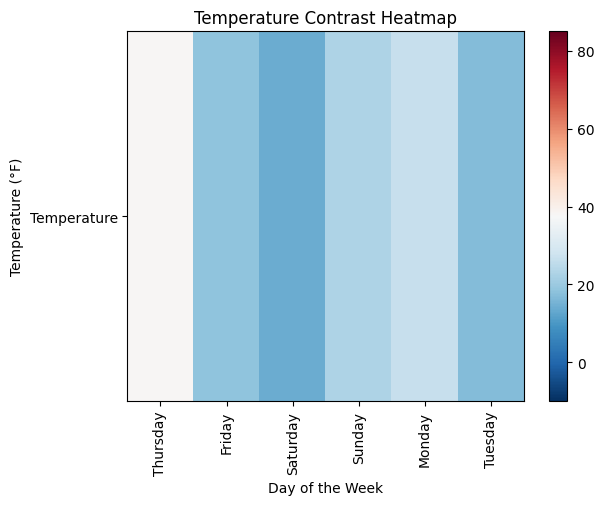


No specific good days identified for outdoor activity.

 Thursday, Friday, Saturday, Sunday, Monday, Tuesday are bad days for outdoor Activity:

All days for this week appears to be bad for outdoor activity.

I recommend you stay home on these days. If you would like to go out still, ensure to take measures that accomodates for this weeks weather


In [4]:
#Godwin
# Print weather forecast
def categorize_temperature(temperature):
    if temperature >= 80:
        return "Hot"
    elif 60 <= temperature < 80:
        return "Moderate"
    else:
        return "Cold"
loc = address.upper()
print(f"\nWEATHER FORECAST FOR {loc}")
print("================")
good_days = []
bad_days = []
temp_values = []
# Iterate through daily results and print the weather forecast
        #Question 1 resolution
for daily_result in jif['timelines']['daily']:
  timestamp_str = daily_result['time']
  timestamp_dt = datetime.strptime(timestamp_str, "%Y-%m-%dT%H:%M:%SZ")
  date = timestamp_dt.strftime("%A, %B %d, %Y %I:%M %p")
  day_of_week = timestamp_dt.strftime("%A")
  try:
    temp_avg = round(daily_result['values']['temperatureAvg'])
    temp_max = round(daily_result['values']['temperatureMax'])
    temp_min = round(daily_result['values']['temperatureMin'])
    temp_avg = daily_result['values']['temperatureAvg']
    temp_values.append(temp_avg)

    temp_cat = categorize_temperature(temp_avg)
    print(f"On {date}, average temperature: {temp_avg}°F, with a max temperature of {temp_max}°F,and a min temperature of {temp_min}°F\n This day would be {temp_cat}")

     # Check if it's a good day for outdoor activity based on temperature range
    if 60 <= temp_avg <= 80 :
      good_days.append(day_of_week)
    else:
      bad_days.append(day_of_week)

  except KeyError as e:
      print(f"KeyError: {e}. Check the JSON structure to find the correct key.")
# Create a heatmap using Matplotlib with contrasting colors representative of temperature ranges
# make the heat map a contrast of set temperature ranges
days = [datetime.strptime(day['time'], "%Y-%m-%dT%H:%M:%SZ").strftime("%A") for day in jif['timelines']['daily']]
fig, ax = plt.subplots()
cats = ax.imshow([temperature_values], cmap='RdBu_r', aspect='auto', vmin = -10, vmax=85)
ax.set_xticks(np.arange(len(days)))
ax.set_yticks([0])
ax.set_xticklabels(days)
plt.xticks(rotation=90)
ax.set_yticklabels(["Temperature"])
plt.xlabel('Day of the Week')
plt.ylabel('Temperature (°F)')
plt.title('Temperature Contrast Heatmap')
plt.colorbar(cats)

# Show the heatmap
plt.show()
# Print the list of good days for outdoor activity
# Print the list of good days for outdoor activity
if good_days:
  gdow = ", ".join(good_days)
  print(f"\n {gdow} would be good days for outdoor activities")
else:
  print("\nNo specific good days identified for outdoor activity.")

        # Print the list of bad days for outdoor activity
if bad_days:
  bdow = ", ".join(bad_days)
  print(f"\n {bdow} are bad days for outdoor Activity:")

else:
  print("\nNo specific bad days identified for outdoor activity.")

        # Check if all days are bad
if len(bad_days) == len(jif['timelines']['daily']):
  print("\nAll days for this week appears to be bad for outdoor activity.")

        # Check if all days would be good
if len(good_days) == len(jif['timelines']['daily']):
  print("\nAll days for this week appears to be good for outdoor activity.")
else:
  print("\nI recommend you stay home on these days. If you would like to go out still, ensure to take measures that accomodates for this weeks weather")

In [5]:
#Franck i moved yours up to replace mine becausse i like the format...

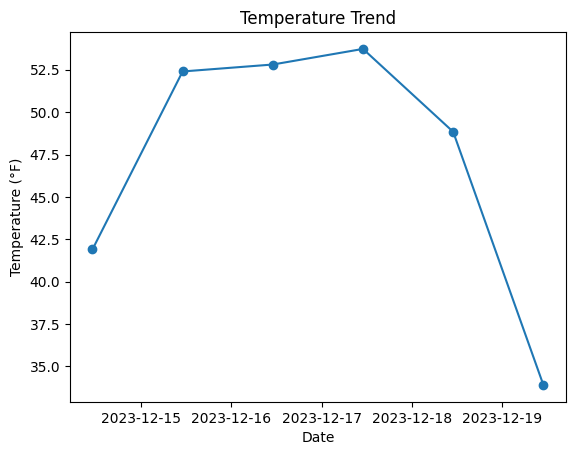

In [6]:
#Franck
# Make the API setup
url = "https://api.tomorrow.io/v4/weather/forecast?location=maryland&timesteps=1d&units=imperial&apikey=oRinGWHgBjn0BwrZOREvkxsx2q2U8eqY"
headers = {"accept": "application/json"}
response = requests.get(url, headers=headers)
data = js.loads(response.text)

# Extract the relevant information that will be used for this project
daily_forecast = data['timelines']['daily']
dates = [datetime.strptime(day['time'], "%Y-%m-%dT%H:%M:%SZ") for day in daily_forecast]
temperatures = [day['values']['temperatureMax'] for day in daily_forecast]

plt.plot(dates, temperatures, marker='o')
plt.title('Temperature Trend')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.show()

In [7]:
#Franck Monte
# create a DataFrame by using Pandas to display the day of the week with the max temperature, wind and precipitation.
weather_data = {'Date': dates,
                'TemperatureMax': [day['values']['temperatureMax'] for day in daily_forecast],
                'WindSpeedAvg': [day['values']['windSpeedAvg'] for day in daily_forecast],
                'PrecipitationProbabilityAvg': [day['values']['precipitationProbabilityAvg'] for day in daily_forecast]}

df = pd.DataFrame(weather_data)
df['DayOfWeek'] = df['Date'].dt.day_name()

df

,Date,TemperatureMax,WindSpeedAvg,PrecipitationProbabilityAvg,DayOfWeek
0,2023-12-14 11:00:00,41.90,5.10,0,Thursday
1,2023-12-15 11:00:00,52.40,8.16,0,Friday
2,2023-12-16 11:00:00,52.81,6.70,0,Saturday
3,2023-12-17 11:00:00,53.73,10.17,73,Sunday
4,2023-12-18 11:00:00,48.84,16.54,13,Monday
5,2023-12-19 11:00:00,33.91,15.95,0,Tuesday


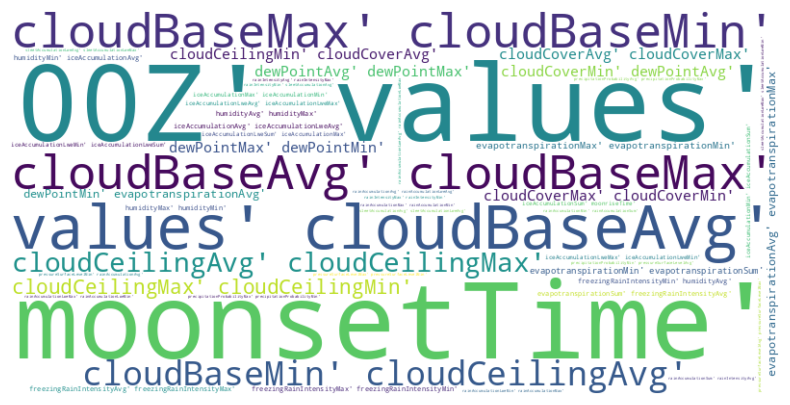

In [8]:
#Franck Monte
values_keys = [(str(k), str(v)) for k, v in data['timelines'].items()]
text = ' '.join([' '.join(pair) for pair in values_keys])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

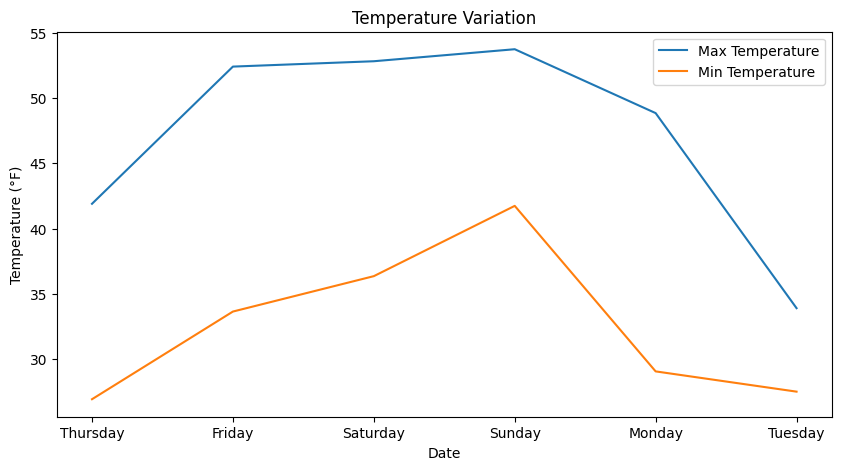

,cloudBaseAvg,cloudBaseMax,cloudBaseMin,cloudCeilingAvg,cloudCeilingMax,cloudCeilingMin,cloudCoverAvg,cloudCoverMax,cloudCoverMin,dewPointAvg,...,weatherCodeMax,weatherCodeMin,windDirectionAvg,windGustAvg,windGustMax,windGustMin,windSpeedAvg,windSpeedMax,windSpeedMin,time
Week days,,,,,,,,,,,,,,,,,,,,,
Thursday,0.16,0.98,0.00,0.04,0.82,0.00,9.17,92.00,0.00,20.14,...,1000,1000,268.96,10.43,17.79,0.42,5.10,7.63,0.28,2023-12-14 11:00:00+00:00
Friday,0.14,1.50,0.00,0.28,6.33,0.00,10.59,100.00,0.00,28.15,...,1000,1000,265.95,14.99,25.31,7.88,8.16,11.44,6.16,2023-12-15 11:00:00+00:00
Saturday,2.41,5.65,0.02,2.45,7.10,0.00,99.28,100.00,86.83,35.52,...,1001,1001,141.89,12.26,16.27,8.58,6.70,8.55,4.59,2023-12-16 11:00:00+00:00
Sunday,0.08,0.28,0.02,0.51,1.99,0.02,99.76,100.00,97.63,49.37,...,4001,4001,121.84,20.91,31.51,14.12,10.17,14.65,7.43,2023-12-17 11:00:00+00:00
Monday,0.25,0.72,0.00,0.32,1.97,0.00,75.07,100.00,16.28,32.27,...,5001,5001,274.49,29.40,39.40,23.01,16.54,22.23,11.68,2023-12-18 11:00:00+00:00
Tuesday,0.43,0.63,0.00,0.00,0.00,0.00,56.25,99.26,0.00,15.43,...,1102,1102,304.83,27.10,34.72,21.25,15.95,19.66,9.51,2023-12-19 11:00:00+00:00


In [9]:
#Franck Monte
# Extracting all relevant information for analysis
daily_data = data['timelines']['daily']
df = pd.DataFrame([day['values'] for day in daily_data])
df['time'] = pd.to_datetime([day['time'] for day in daily_data])
df['Week days'] = df['time'].dt.day_name()
df.set_index('Week days', inplace=True)
#df['DayOfWeek'] = df['Date'].dt.day_name()
# Additional Analysis: Plotting Temperature Trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=df.index, y=df['temperatureMax'], label='Max Temperature')
sns.lineplot(x=df.index, y=df['temperatureMin'], label='Min Temperature')
plt.title('Temperature Variation')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

# Save DataFrame to CSV
df.to_csv('weather.csv', index=True)

df

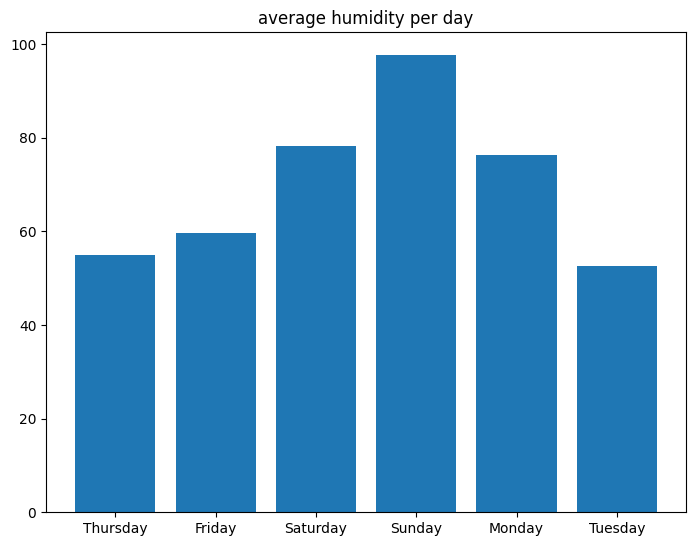

In [10]:
#Franck
#generate the bar chart to observe which day has the higher humidity.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
humidity = df['humidityAvg']
ax.bar(days, humidity)
plt.title('average humidity per day')
plt.show()

In [14]:
#FRANCK
# Check for the codition to go outside and Run
temperature_run = data['timelines']['daily'][0]['values']['temperatureAvg']
rain_intensity_run = data['timelines']['daily'][0]['values']['rainIntensityMax']
wind_speed_run = data['timelines']['daily'][0]['values']['windSpeedAvg']

print("Check if the weather allow outdoor activity:")
print(f"Temperature: {temperature_run}°F")
print(f"Rain Intensity: {rain_intensity_run} mm/hr")
print(f"Wind Speed: {wind_speed_run} mph")

if 50 <= temperature_run <= 75 and rain_intensity_run == 0 and wind_speed_run <= 10:
    print("It's a good day to go outside for a run!\n")
else:
    print("Check the weather to find another day to plan a running time.\n")

# Check for the weather to determine if the weather are ideal for Picnic
temperature_picnic = data['timelines']['daily'][1]['values']['temperatureAvg']
rain_accumulation_picnic = data['timelines']['daily'][1]['values']['rainAccumulationSum']
wind_speed_picnic = data['timelines']['daily'][1]['values']['windSpeedAvg']

print("Check if the condition are appropriate for Picnic:")
print(f"Temperature: {temperature_picnic}°F")
print(f"Rain Accumulation: {rain_accumulation_picnic} mm")
print(f"Wind Speed: {wind_speed_picnic} mph")

if 60 <= temperature_picnic <= 80 and rain_accumulation_picnic == 0 and wind_speed_picnic <= 15:
    print("Typical day to go out for a picnic!\n")
else:
    print("It might not be a good idea to go out! you should consider another for a picnic.\n")

# Weather warning
rain_alert = data['timelines']['daily'][2]['values']['rainIntensityMax']
wind_alert = data['timelines']['daily'][2]['values']['windSpeedMax']
visibility_alert = data['timelines']['daily'][2]['values']['visibilityMin']

print("Warning about weather Conditions:")
print(f"Rain Intensity: {rain_alert} mm/hr")
print(f"Wind Speed: {wind_alert} mph")
print(f"Visibility: {visibility_alert} miles")

if rain_alert > 0.1 or wind_alert > 20 or visibility_alert < 1:
    print("Weather alert: The conditions outside seems not to be favorable. You should stay at home and check the weather leater for an update.")
else:
    print("Weather seems to be normal. Enjoy your day and have fun!")


Check if the weather allow outdoor activity:
Temperature: 35.28°F
Rain Intensity: 0 mm/hr
Wind Speed: 5.1 mph
Check the weather to find another day to plan a running time.

Check if the condition are appropriate for Picnic:
Temperature: 41.99°F
Rain Accumulation: 0 mm
Wind Speed: 8.16 mph
It might not be a good idea to go out! you should consider another for a picnic.

Warning about weather Conditions:
Rain Intensity: 0 mm/hr
Wind Speed: 8.55 mph
Visibility: 4.6 miles
Weather seems to be normal. Enjoy your day and have fun!
